In [4]:
with open('bsgs.txt', 'r') as f:
    lines = f.read().splitlines()

# 0 is sequential
avg_40 = [0] * 65
avg_48 = [0] * 65

i = 0
while i < len(lines):
    nw = lines[i].split(' ')[3]
    sum_times = 0
    for _ in range(10):
        comment= lines[i]
        i += 1
        time = float(lines[i].split(' ')[3])
        i += 1
        sum_times += time
    avg_40[int(nw)] += sum_times / 10

    sum_times = 0
    for _ in range(10):
        comment= lines[i]
        i += 1
        time = float(lines[i].split(' ')[3])
        i += 1
        sum_times += time
    avg_48[int(nw)] += sum_times / 10

avg_40[-5:], avg_48[-5:]

([70183.5, 60146.1, 66532.3, 65690.8, 66960.9],
 [769257.0, 700874.6, 771328.0, 734648.9, 784993.4])

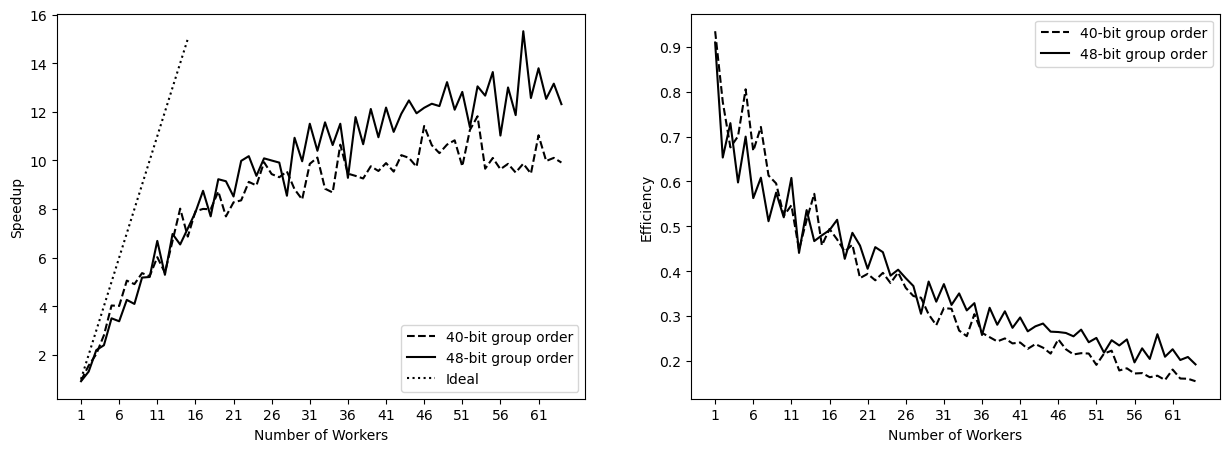

In [48]:
speedup_40 = [avg_40[0] / x for x in avg_40[1:]]
speedup_48 = [avg_48[0] / x for x in avg_48[1:]]

efficiency_40 = [x / (i+1) for i, x in enumerate(speedup_40)]
efficiency_48 = [x / (i+1) for i, x in enumerate(speedup_48)]


from matplotlib import pyplot as plt

# plot both speedup and efficiency on the same figure, different subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(a, label='32-bit', color='black', linestyle='dashed')
x_axis = [x+1 for x in range(len(speedup_40))]
ax1.plot(x_axis, speedup_40, label='40-bit group order', color='black', linestyle='dashed')
ax1.plot(x_axis, speedup_48, label='48-bit group order', color='black', linestyle='solid')
ax1.plot(x_axis[:15], x_axis[:15], label='Ideal', color='black', linestyle='dotted')
ax1.xaxis.set_ticks([x for x in range(1, len(speedup_40)+1, 5)])
ax1.set_xlabel('Number of Workers')
ax1.set_ylabel('Speedup')
# ax1.set_title('Parallel BSGS')
ax1.legend()

# second subplot
# ax2.plot(e_a, label='32-bit', color='black', linestyle='dashed')
ax2.plot(x_axis, efficiency_40, label='40-bit group order', color='black', linestyle='dashed')
ax2.plot(x_axis, efficiency_48, label='48-bit group order', color='black', linestyle='solid')
ax2.set_xlabel('Number of Workers')
ax2.set_ylabel('Efficiency')
ax2.xaxis.set_ticks([x for x in range(1, len(speedup_40)+1, 5)])
# ax2.set_title('Parallel BSGS')
ax2.legend()

plt.show()

#fig.savefig('bsgs.pdf')

# save pdf with no borders
fig.savefig('bsgs.pdf', bbox_inches='tight')


In [6]:

with open('load_factor.txt', 'r') as f:
    lines = f.read().splitlines()

data = {}

i = 0
while i < len(lines):
    #print(lines[i])
    nw = int(lines[i].split(' ')[3])
    #print(nw)
    load_factor = float(lines[i].split(' ')[-1])
    time_sum = 0
    for _ in range(10):
        comment = lines[i]
        i += 1
        time = float(lines[i].split(' ')[3])
        #print(time)
        time_sum += time
        i += 1
    if data.get(nw) is None:
        data[nw] = []
    data[nw].append((load_factor, time_sum / 10 * nw))


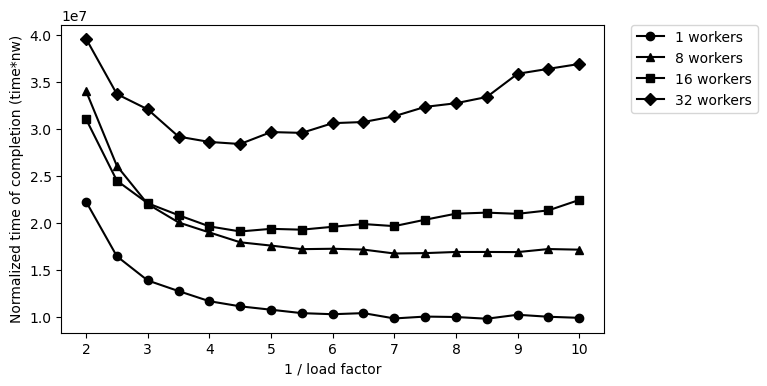

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# choose subset of workers
data = {k: v for k, v in data.items() if k in [1, 8, 16, 32]}

for i, nw in zip(['o', '^', 's', 'D', 'v'], data):
    ax.plot([x[0] for x in data[nw]], [x[1] for x in data[nw]], label='{} workers'.format(nw), marker=i, color='black')

ax.set_xlabel('1 / load factor')
ax.set_ylabel('Normalized time of completion (time*nw)')
# ax.set_title('Load factor impact on parallel BSGS')
# ax.legend()
# set legend to outside of plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

fig.savefig('load_factor.pdf', bbox_inches='tight')

In [26]:

with open('poh.txt', 'r') as f:
    lines = f.read().splitlines()

data_1bsgs_1 = []
data_1bsgs_3 = []

i = 0
while i < len(lines):
    nw_poh = int(lines[i].split(' ')[3])
    nw_bsgs = int(lines[i].split(' ')[6])
    filename = lines[i].split(' ')[-1]
    time_sum = 0
    for _ in range(10):
        comment = lines[i]
        i += 1
        time = float(lines[i].split(' ')[0])
        time_sum += time
        i += 1
    
    data_1bsgs_1.append(time_sum / 10)

    time_sum = 0
    for _ in range(10):
        comment = lines[i]
        i += 1
        time = float(lines[i].split(' ')[0])
        time_sum += time
        i += 1
    
    data_1bsgs_3.append(time_sum / 10)

    if len(data_1bsgs_1) == 33:
        break


data_nworkers_bsgs_1 = {}
data_nworkers_bsgs_3 = {}

for _ in range(3):
    while i < len(lines):
        nw_poh = int(lines[i].split(' ')[3])
        nw_bsgs = int(lines[i].split(' ')[6])


        filename = lines[i].split(' ')[-1]
        time_sum = 0
        for _ in range(10):
            comment = lines[i]
            i += 1
            time = float(lines[i].split(' ')[0])
            time_sum += time
            i += 1
        
        if data_nworkers_bsgs_1.get(nw_bsgs) is None:
            data_nworkers_bsgs_1[nw_bsgs] = []
            
        data_nworkers_bsgs_1[nw_bsgs].append(time_sum / 10)

        time_sum = 0
        for _ in range(10):
            comment = lines[i]
            i += 1
            time = float(lines[i].split(' ')[0])
            time_sum += time
            i += 1
        
        if data_nworkers_bsgs_3.get(nw_bsgs) is None:
            data_nworkers_bsgs_3[nw_bsgs] = []
        
        data_nworkers_bsgs_3[nw_bsgs].append(time_sum / 10)

        if len(data_nworkers_bsgs_3[nw_bsgs]) == 33:
            break


data_nworkers_bsgs_1.keys()

dict_keys([2, 4, 8])

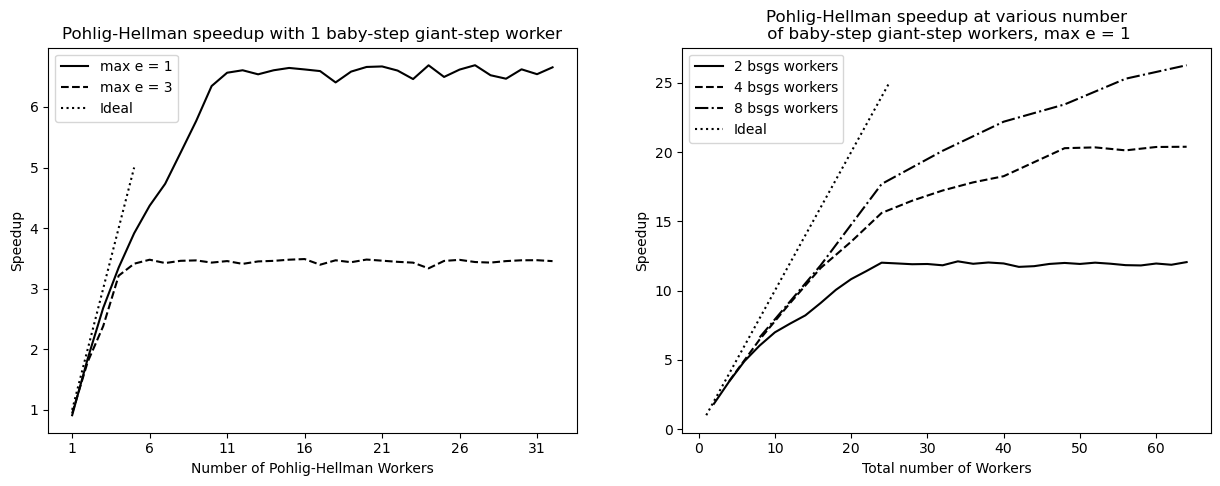

In [47]:
speedup_1bsgs_1 = [data_1bsgs_1[0] / x for x in data_1bsgs_1[1:]]
speedup_1bsgs_3 = [data_1bsgs_3[0] / x for x in data_1bsgs_3[1:]]

efficiency_1bsgs_1 = [x / (i+1) for i, x in enumerate(speedup_1bsgs_1)]
efficiency_1bsgs_3 = [x / (i+1) for i, x in enumerate(speedup_1bsgs_3)]

# plot both speedup and efficiency on the same figure, different subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(a, label='32-bit', color='black', linestyle='dashed')
ax1.title.set_text('Pohlig-Hellman speedup with 1 baby-step giant-step worker')
x_axis = [x+1 for x in range(len(speedup_1bsgs_3))]
ax1.plot(x_axis, speedup_1bsgs_1, label='max e = 1', color='black', linestyle='solid')
ax1.plot(x_axis, speedup_1bsgs_3, label='max e = 3', color='black', linestyle='dashed')
ax1.plot(x_axis[:5], x_axis[:5], label='Ideal', color='black', linestyle='dotted')
ax1.xaxis.set_ticks([x for x in range(1, len(speedup_1bsgs_3)+1, 5)])
ax1.set_xlabel('Number of Pohlig-Hellman Workers')
ax1.set_ylabel('Speedup')
# ax1.set_title('Parallel BSGS')
ax1.legend()


speedup_2bsgs_1 = [data_nworkers_bsgs_1[2][0] / x for x in data_nworkers_bsgs_1[2][1:]]
speedup_4bsgs_1 = [data_nworkers_bsgs_1[4][0] / x for x in data_nworkers_bsgs_1[4][1:]]
speedup_8bsgs_1 = [data_nworkers_bsgs_1[8][0] / x for x in data_nworkers_bsgs_1[8][1:]]

# second subplot
# ax2.plot(e_a, label='32-bit', color='black', linestyle='dashed')
ax2.title.set_text('Pohlig-Hellman speedup at various number\n of baby-step giant-step workers, max e = 1')
ax2.plot([x * 2 for x in x_axis], speedup_2bsgs_1, label='2 bsgs workers', color='black', linestyle='solid')
ax2.plot([x*4 for x in x_axis][:64//4], speedup_4bsgs_1[:64//4], label='4 bsgs workers', color='black', linestyle='dashed')
ax2.plot([x*8 for x in x_axis][:64//8], speedup_8bsgs_1[:64//8], label='8 bsgs workers', color='black', linestyle='dashdot')
ax2.plot(x_axis[:25], x_axis[:25], label='Ideal', color='black', linestyle='dotted')
ax2.set_xlabel('Total number of Workers')
ax2.set_ylabel('Speedup')
#ax2.xaxis.set_ticks([x for x in range(1, len(speedup_1bsgs_3)+1, 5)])
# ax2.set_title('Parallel BSGS')
ax2.legend()

plt.show()

#fig.savefig('bsgs.pdf')

# save pdf with no borders
fig.savefig('poh.pdf', bbox_inches='tight')

In [57]:
with open('poh_ff.txt', 'r') as f:
    lines = f.read().splitlines()

data_ff_1 = {}
data_ff_3 = {}
i = 0
for _ in range(4):
    bsgs_pattern = '-'.join(lines[i].split(' ')[11:14])
    print(bsgs_pattern)
    while i < len(lines):
        nw_poh = int(lines[i].split(' ')[3])


        filename = lines[i].split(' ')[-1]
        time_sum = 0
        for _ in range(10):
            comment = lines[i]
            i += 1
            time = float(lines[i].split(' ')[3])
            time_sum += time
            i += 1
        
        if data_ff_1.get(bsgs_pattern) is None:
            data_ff_1[bsgs_pattern] = []
            
        data_ff_1[bsgs_pattern].append(time_sum / 10)

        time_sum = 0
        for _ in range(10):
            comment = lines[i]
            i += 1
            time = float(lines[i].split(' ')[3])
            time_sum += time
            i += 1
        
        if data_ff_3.get(bsgs_pattern) is None:
            data_ff_3[bsgs_pattern] = []
        
        data_ff_3[bsgs_pattern].append(time_sum / 10)

        if len(data_ff_3[bsgs_pattern]) == 6:
            break


1-1-1
2-2-2
4-4-4
1-2-8


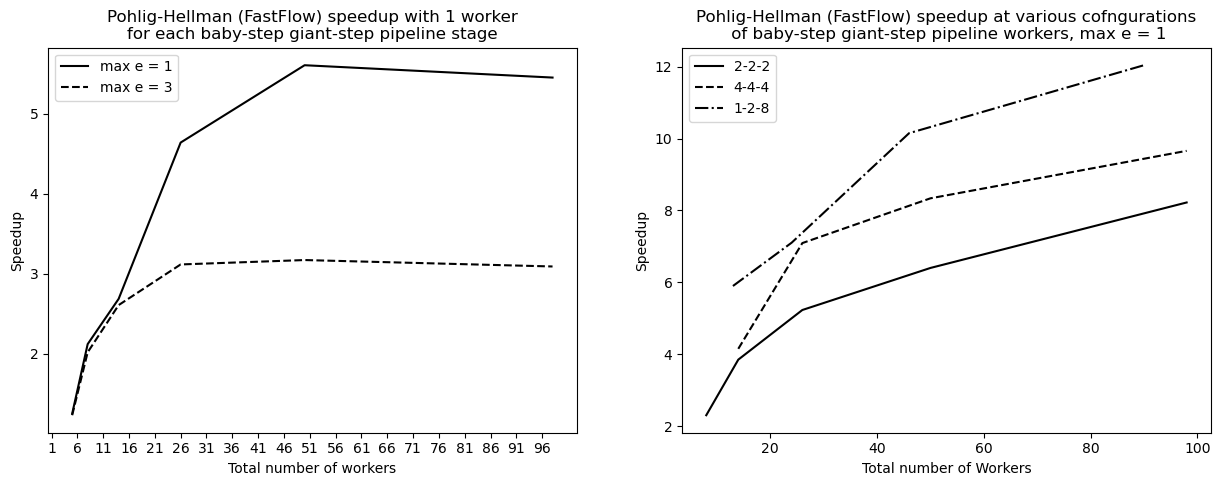

In [84]:
speedup_ff1 = [data_1bsgs_1[0] / x for x in data_ff_1['1-1-1']]
speedup_ff3 = [data_1bsgs_3[0] / x for x in data_ff_3['1-1-1']]

# plot both speedup and efficiency on the same figure, different subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(a, label='32-bit', color='black', linestyle='dashed')
ax1.title.set_text('Pohlig-Hellman (FastFlow) speedup with 1 worker\nfor each baby-step giant-step pipeline stage')
x_axis = [1, 2, 4, 8, 16, 32]
ax1.plot([x*3 + 2 for x in x_axis], speedup_ff1, label='max e = 1', color='black', linestyle='solid')
ax1.plot([x*3 + 2 for x in x_axis], speedup_ff3, label='max e = 3', color='black', linestyle='dashed')
# ax1.plot(range(1, 5), range(1, 5), label='Ideal', color='black', linestyle='dotted')
ax1.xaxis.set_ticks([x for x in range(1, len(speedup_1bsgs_3)*3+1, 5)])
ax1.set_xlabel('Total number of workers')
ax1.set_ylabel('Speedup')
# ax1.set_title('Parallel BSGS')
ax1.legend()


speedup_ff1_222 = [data_1bsgs_1[0] / x for x in data_ff_1['2-2-2']]
speedup_ff1_444 = [data_1bsgs_1[0] / x for x in data_ff_1['4-4-4']]
speedup_ff1_128 = [data_1bsgs_1[0] / x for x in data_ff_1['1-2-8']]

# second subplot
# ax2.plot(e_a, label='32-bit', color='black', linestyle='dashed')
ax2.title.set_text('Pohlig-Hellman (FastFlow) speedup at various cofngurations\n of baby-step giant-step pipeline workers, max e = 1')
ax2.plot([x * 6 + 2 for x in x_axis][:5], speedup_ff1_222[:5], label='2-2-2', color='black', linestyle='solid')
ax2.plot([x*12 + 2 for x in x_axis][:4], speedup_ff1_444[:4], label='4-4-4', color='black', linestyle='dashed')
ax2.plot([x*11 + 2 for x in x_axis][:4], speedup_ff1_128[:4], label='1-2-8', color='black', linestyle='dashdot')
# ax2.plot(range(1, 8), range(1, 8), label='Ideal', color='black', linestyle='dotted')
ax2.set_xlabel('Total number of Workers')
ax2.set_ylabel('Speedup')
#ax2.xaxis.set_ticks([x for x in range(1, len(speedup_1bsgs_3)+1, 5)])
# ax2.set_title('Parallel BSGS')
ax2.legend()

plt.show()

#fig.savefig('bsgs.pdf')

# save pdf with no borders
fig.savefig('poh_ff.pdf', bbox_inches='tight')